In [1]:
import sys

install_pgkyl = False
if install_pgkyl:
    print("pull postgkyl repository")
    !git -C ~/postgkyl/ pull
    # install postgkyl (required by pygkyl)
    !{sys.executable} -m pip install ~/postgkyl/ > ~/personal_gkyl_scripts/pygkyl/postgkyl_install.log

install_pygkyl = True
if install_pygkyl:
    print("pull personal_gkyl_scripts repository")
    !git -C ~/personal_gkyl_scripts/ pull
    # Clean the pygkyl build and egg-info directories
    !rm -rf ~/personal_gkyl_scripts/pygkyl/pygkyl.egg-info
    !rm -rf ~/personal_gkyl_scripts/pygkyl/build
    # Install the pygkyl package
    !{sys.executable} -m pip install ~/personal_gkyl_scripts/pygkyl > ~/personal_gkyl_scripts/pygkyl/pygkyl_install.log
# Import the pygkyl package
import pygkyl

pull personal_gkyl_scripts repository
Already up to date.


In [2]:
simdir = '/Users/ahoffmann/gyacomo/simulations/problem_01/'
fileprefix = 'outputs_00.h5'
simulation = pygkyl.simulation_configs.import_config( 'gyacomo', simdir, fileprefix)

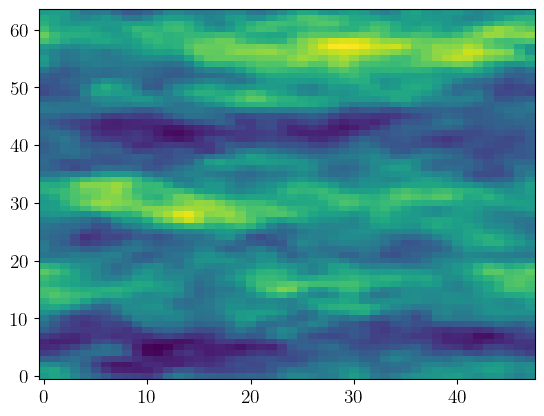

In [10]:
time, Ni00, tf = simulation.gyac.load_data_3D_frame('phi',100.0, species='ion', xyz=True)
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(Ni00[:,:], origin='lower', aspect='auto')